"""
• Image Noise
• Spatial Image Filtering
• Implementing Maximum Filter
• Linear Filtering
• Implementing Linear Filtering
• Smoothing Filter

"""

In [2]:
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
from enum import Enum

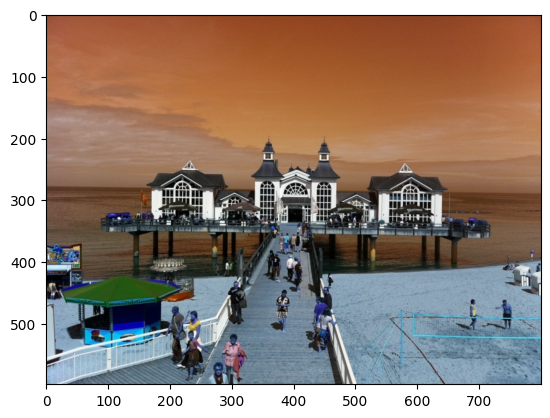

In [4]:
# Replace random pixel with 'salt (255)' or 'pepper (0)' noise

def saltandPepperNoise(image, pct):

    # calculate and iterate over the number of noise spots
    num = int((image.shape[0]*image.shape[1])*(pct/100))

    for y in range(0,num):
        # generate random noise
        rd = 0 # pepper
        if random.randrange(2):
            rd = 255
        # get random row and col index
        row = random.randrange(0, image.shape[0]) # 0 to height
        col = random.randrange(0, image.shape[1]) # 0 to width

        # replace random pixel with noise
        image[row,col] = rd

# read image
image = cv2.imread('Video/pier.jpg')

# show input image
plt.imshow(image)
plt.show()

# cv2.namedWindow('Salt and Pepper Noise')
# # show input image
# cv2.imshow("Input image", image)
 
# noise percentage
pct = 0
pct_old = -1

while True:

    if pct_old != pct:
        pct_old = pct

        # create a new matrix to copy image
        noise_img = image.copy()

        # call saltandPepperNoise funct
        saltandPepperNoise(noise_img, pct)

        # put text
        cv2.putText(noise_img, 'Noise: '+ str(format(pct)+'%'), (25,40), cv2.FONT_HERSHEY_PLAIN, 2.0, (255,255,255), 2)

        # show image
        cv2.imshow("Salt and pepper", noise_img)

    # handle keyboard event:
    key = cv2.waitKey(10)
    if key == 119: # w: increase noise
        if(pct <100):
            pct += 1
    elif key == 121: # y: decrease noise
        if(pct>0):
            pct -= 1
    elif key == 27: # [esc]:quit
        break

cv2.destroyAllWindows()




uint8
0
255


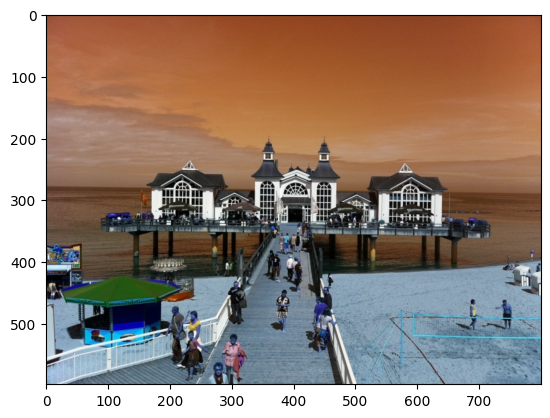

In [5]:
# Add gaussian noise

def GaussianNoise(image, mean, std):

    # generate array with samples from normal distribution by mean and std
    gaussian_noise = np.random.normal(mean, std, image.shape)

    # create empty image of type float
    noisy_image = np.empty(image.shape, np.float32)

    # add noise to the image
    noisy_image = image + gaussian_noise

    # normalise the noise image since it contains value outside (0-255)
    cv2.normalize(noisy_image, noisy_image, 0, 255, cv2.NORM_MINMAX)
 
    # cast to original image type (uint8)
    noisy_image = noisy_image.astype(image.dtype)

    return noisy_image


image = cv2.imread('Video/pier.jpg', 1)
# cv2.imshow("Input image", image)
plt.imshow(image)

print(image.dtype)
print(np.amin(image))
print(np.amax(image))


# intialize mean and standard deviation
mean = 1.0
mean_prev = 0.0
std = 5.0
std_prev = 0.0


while True:
    if mean_prev != mean or std_prev != std:
        mean_prev = mean
        std_prev = std

        # call function
        noise_img = GaussianNoise(image, mean, std)

        # put text into the output image
        cv2.putText(noise_img, "mean: "+str(format(mean, '.1f'))+"  std: "+str(std), (25, 40), cv2.FONT_HERSHEY_PLAIN, 2.0, (255,255,255), 2)

        # show image
        cv2.imshow('Gaussian noise',noise_img)
    
    # handle keyboard event
    key = cv2.waitKey(10) # waiting 10 ms and get the keyboard event
    if key == 119: # w => increase mean
        if(mean < 100.0):
            mean += 1.0
    elif  key == 121: # y => decrease mean
        if(mean > -100.0): 
            mean -= 1.0
    elif  key == 115: # s => increase stdev
        if(std < 100): 
            std += 1.0
    elif  key == 97: # a => decrease stdev
        if(std > 0): 
            std -= 1.0
    elif  key == 27: # ESC => break the loop
        break

cv2.destroyAllWindows()




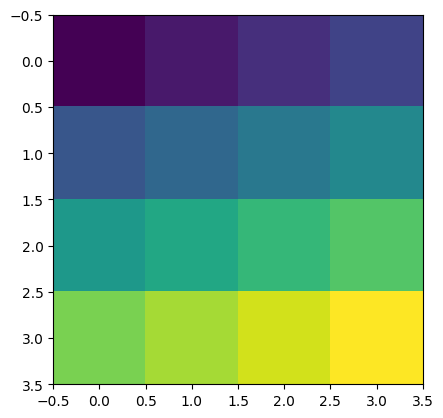

Input image with size : 4 4
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
Kernel size 3
Input image with padding size 1
[[ 0  0  0  0  0  0]
 [ 0  1  2  3  4  0]
 [ 0  5  6  7  8  0]
 [ 0  9 10 11 12  0]
 [ 0 13 14 15 16  0]
 [ 0  0  0  0  0  0]]
Output image with size: 4 4
[[ 6  7  8  8]
 [10 11 12 12]
 [14 15 16 16]
 [14 15 16 16]]


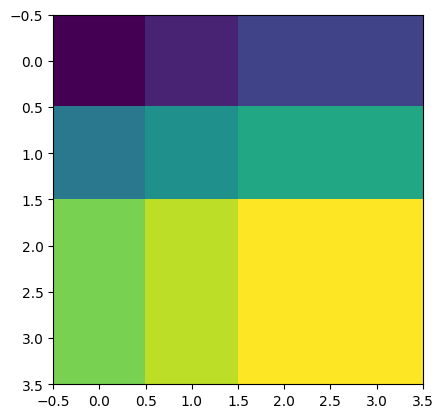

In [6]:
# Filtering : Non-Linear filtering

class PRINT_MODE(Enum):
    ON =1
    OFF = 2

# Maximum filtering with constant zero padding 

def nonLinearFilter (image, kernel_size, print_mode=PRINT_MODE.OFF):

    # check kernel size
    if kernel_size % 2 == 0:
        print('Error: kernel is not valid')
        return None
    else:

        # apply zero padding depending on kernel size

        pad_size = int(kernel_size/2)
        pad_img = np.pad(image, pad_size, mode='constant') # other mode: zero/constant edge, reflect, mean, symmetric  or wrap

        # create empty image with size of padded image

        temp_img = np.zeros(pad_img.shape, image.dtype)

        # apply maximum filtering to the padded input image

        klist = list() # list of values covered by the kernel
        khsize = int(kernel_size/2)
        # print(pad_img.shape[0])

        # iterate over the input image 
        for y in range(khsize, pad_img.shape[0]-khsize):
            # print(y)
            for x in range(khsize, pad_img.shape[1]-khsize):

                #iterate over kernal around the anchor point
                for k in range(kernel_size):
                    for l in range(kernel_size):

                        # calculate corresponding index of padded image
                        yk = y + k - khsize
                        xk = x + l - khsize
                        # print(yk, xk)

                        # add value to the kernel list
                        klist.append(pad_img[yk][xk])

                # assign min value to corresponding point of the output image
                # print(klist)
                temp_img[y,x] = max(klist)
                # print("temp_img:",temp_img[y,x])
                klist.clear()
            
        # remove padding of output image
        output = temp_img[khsize:temp_img.shape[0]-khsize, khsize:temp_img.shape[1]-khsize]

        # print if print_mode is on
        if print_mode == PRINT_MODE.ON:
            print("Input image with size :", image.shape[0], image.shape[1])
            print(image)
            print('Kernel size', kernel_size)
            print("Input image with padding size", pad_size)
            print(pad_img)
            print("Output image with size:", output.shape[0], output.shape[1])
            print(output)

        return output

    

# create image
img = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12], [13,14,15,16]], dtype = np.uint8)
# img = cv2.imread('Video/pier.jpg')
plt.imshow(img)
plt.show()
# apply filtering
img_res = nonLinearFilter(img, 3, print_mode=PRINT_MODE.ON)

plt.imshow(img_res)
plt.show()


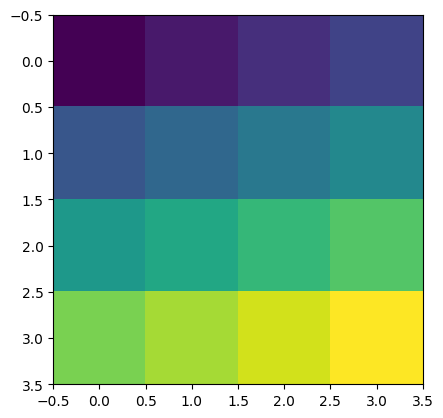

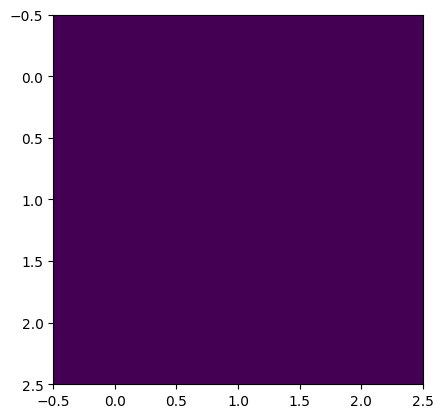

Input image with size: 4 4
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
Kernel with size: 3
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
Input image with padding size 1
[[ 0  0  0  0  0  0]
 [ 0  1  2  3  4  0]
 [ 0  5  6  7  8  0]
 [ 0  9 10 11 12  0]
 [ 0 13 14 15 16  0]
 [ 0  0  0  0  0  0]]
Output image with size: 4 4
[[ 2  3  3  2]
 [ 4  6  7  5]
 [ 6 10 11  8]
 [ 5  8  9  6]]


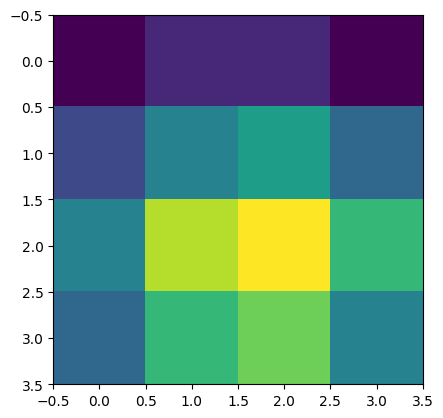


OpenCV filter2D:
 [[ 2  3  3  2]
 [ 4  6  7  5]
 [ 6 10 11  8]
 [ 5  8  9  6]]


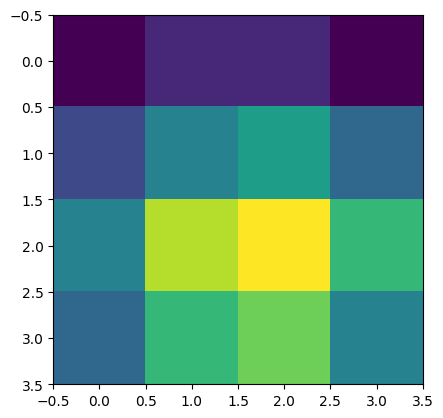

In [31]:
'''
Linear Filtering: linear combination of neighbouring input pixels
(weighted sum of products with weights given by the kernel)

2D correlation: f(x + k, y + l)
2D convolution: f(x - k, y - l), convolution have flipped kernel

'''

# Filtering : Linear filter

class PRINT_MODE(Enum):
    ON = 1
    OFF = 2

class OPERATION_TYPE(Enum):
    Convolution = 1
    Correlation = 2


# Linear spatial filtering with constant zero padding
def linearFiltering(image, kernel, operation_type = OPERATION_TYPE.Correlation, print_mode= PRINT_MODE.OFF):

    # check kernel
    kernel_size = kernel.shape[0]

    if kernel_size % 2 == 0 or kernel.shape[0] != kernel.shape[1]:
        print("Error: Kernel size must be odd and square.")
        return None

    else:

        # check operation type
        if operation_type == OPERATION_TYPE.Convolution:
            kernel = np.rot90(np.rot90(kernel)) # rotate the kernel by 180 degree

        # apply zero padding depending on kernel size
        pad_size = int(kernel_size/2)
        pad_img = np.pad(image, pad_size, mode='constant')

        # create empty image
        temp_img = np.zeros(pad_img.shape, pad_img.dtype)

        #apply filter to padded image
        khsize = int(kernel_size/2)

        # iterate over input image
        for y in range(khsize, pad_img.shape[0]-khsize): #height
            for x in range(khsize, pad_img.shape[1]-khsize): # width
                sum = 0

                # iterate over kernel
                for k in range(kernel.shape[0]):
                    for l in range(kernel.shape[1]):

                        # calculate corresponding index of padded image
                        yk = y + k - khsize
                        xk = x + l - khsize

                        # calculate weighted sum of neighbourhood pixel
                        sum += pad_img[yk, xk] * kernel[k,l] 

                # assign new value to corresponding point of the output image
                temp_img[y, x] = round(sum)

        # remove padding
        output = temp_img[khsize: temp_img.shape[0]-khsize, khsize:temp_img.shape[1]-khsize]

        if print_mode == PRINT_MODE.ON:
            print("Input image with size:", image.shape[0], image.shape[1])
            print(image)
            print("Kernel with size:", kernel_size)
            print(kernel)
            print("Input image with padding size", pad_size)
            print(pad_img)
            print("Output image with size:", output.shape[0], output.shape[1])
            print(output)

        return output

""" Test linear filtering """

# read or create image
# img = cv2.imread('pier.jpg',0)
#cv2.imshow("Input image", img)
img = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12], [13,14,15,16]], dtype = np.uint8)
plt.imshow(img)
plt.show()

# create 3x3 Box filter
kernel = 1/9 * np.array([[1, 1, 1],[1, 1, 1],[1, 1, 1]])
# plt.imshow(kernel)
# plt.show()

# apply linear filtering by above function
img_res1 = linearFiltering(img, kernel, operation_type=OPERATION_TYPE.Correlation, print_mode=PRINT_MODE.ON)
# cv2.imshow("Linear Filtering", img_res1)
plt.imshow(img_res1)
plt.show()

# apply OpenCV filtering
img_res = cv2.filter2D(img, -1, kernel, borderType=cv2.BORDER_CONSTANT) # -1: same depth as source image
print("\nOpenCV filter2D:\n", img_res)
# cv2.imshow("OpenCV filter2D", img_res)
plt.imshow(img_res)
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()


In [7]:
# kernel Identity image

# load image

input = cv2.imread('Video/pier.jpg')

# Identity kernel (It will not modify the image)
kernel_identity = np.array([[0,0,0],[0,1,0],[0,0,0]])

# apply the kernels
output = cv2.filter2D(input, -1, kernel_identity)

# show image
cv2.imshow("input", input)
cv2.imshow("Identity kernel", output)

cv2.waitKey(0)
cv2.destroyAllWindows()

• load image as grayscale image
• add noise (Salt & Pepper or Gaussian noise)
• reduce noise by Box and Gaussian filter using cv2.filter2D
• show input, noise image, Box and Gaussian images

In [8]:
# testing with box-kernel with above non-linear and linear filtering

# load image

image = cv2.imread('Video/pier.jpg', 0)

# box kernel
kernel_box = 1 / 9 * np.array([[1,1,1], [1,1,1], [1,1,1]])

# make copy of the image
noise_img_saltPepper = image.copy()
noise_img_gaussian = image.copy()


# function call to Salt and pepper noise
saltandPepperNoise(noise_img_saltPepper, 10)

# function call to gaussian noise
GaussianNoise(noise_img_gaussian, 2, 25)

# apply the kernels

output1 = cv2.filter2D(noise_img_saltPepper, -1, kernel_box)
output2 = cv2.filter2D(noise_img_gaussian, -1, kernel_box)

# display the images
cv2.imshow("Imput", image)
cv2.imshow("saltandPepperNoise", noise_img_saltPepper)
cv2.imshow("GaussianNoise", noise_img_gaussian)
cv2.imshow("box Kernel 1", output1)
cv2.imshow("box kernel 2", output2)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
# Smoothening using cv2 library

output_box = cv2.boxFilter(noise_img_gaussian, -1, (3,3))
output_gaussian = cv2.GaussianBlur(noise_img_gaussian, (3,3), 0)
output_median = cv2.medianBlur(noise_img_gaussian, 3)
output_bilateral = cv2.bilateralFilter(noise_img_gaussian, 3, 5, 5)


# show the images
cv2.imshow("input", image)
# cv2.imshow("noise", noise_img_gaussian)
# cv2.imshow("Box kernel", output_box)
# cv2.imshow("Gaussian Blur", output_gaussian)
# cv2.imshow("Median Blur", output_median)
cv2.imshow("Bilateral filter", output_bilateral)

cv2.waitKey(0)
cv2.destroyAllWindows()